## Monty Hall

We are in a quiz show! 

There are three doors, one with a car behind and the other two with goats, if you can find the car you win.

Partecipants are asked to pick a closed door and the host then opens a different door revealing a goat. Simulate the case in which the partecipant doesn't change the chosen door after the reveal, the case in which they always switch, and a third case in which the partecipant arrives after that one door with a goat has been opened.

### 3 doors

In [1]:
import numpy as np

doors = ['car', 'goat', 'goat'] #the three doors

#winning counts
win_A = 0
win_B = 0
win_C = 0

#number of games
N_tries = 100000

In [2]:
#The conservative case

for j in range(N_tries):
    
    np.random.shuffle(doors)       #shuffling the doors
    
    A = np.random.choice([0,1,2])  #extracting one door for player A
    
    #opening a door for partecipant A that contains a goat and that is different from the one chosen by A
    #in the case of A this passage is useless since they won't change their mind after.
    for i in range(3):
        if doors[i]=='goat' and i!=A:
            open_A = i
            break
            
    #if A finds the car A wins!
    if doors[A] == 'car':
        win_A = win_A +1

#winning probability for A
prob_A = win_A/N_tries

In [3]:
#Switcher case

for j in range(N_tries):
    
    np.random.shuffle(doors)      #shuffling the doors
    
    B = np.random.choice([0,1,2]) #extracting one door for player B
    
    #opening a door different from the one chosen by B that contains a goat
    for i in range(3):  
        if doors[i]=='goat' and i!=B: 
            open_B = i
            break
    
    #B changes idea and picks B_new different from the previous choice and the open door
    for i in range(3):
        if i!=open_B and i!=B:
            B_new = i
    
    #if B finds the car B wins!
    if doors[B_new]=='car':
        win_B = win_B +1
        
#winning probability for B
prob_B = win_B/N_tries

In [4]:
#The late one

for j in range(N_tries):
    doors_C = ['car', 'goat']   #C has only two doors to choose from
    
    np.random.shuffle(doors_C)  #"everyday I'm shuffling"
    
    C = np.random.choice([0,1]) #C picks one of the two doors
    
    #if C gets the car C wins!
    if doors_C[C] == 'car':
        win_C = win_C +1

#winning probability for C
prob_C = win_C/N_tries   

Text(1.88, 0.52047, '0.50')

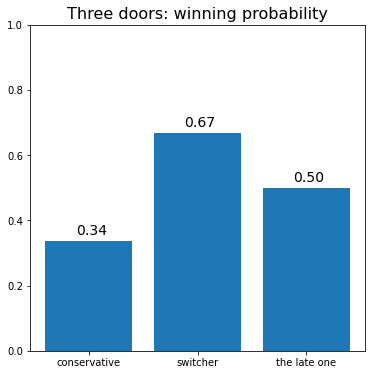

In [5]:
#Visualizing data

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

partecipants = ('conservative', 'switcher', 'the late one')
winning_prob = [prob_A, prob_B, prob_C]

x_pos = np.arange(len(partecipants))
ax.bar(x_pos,winning_prob)
ax.set_xticks(x_pos)
ax.set_xticklabels(partecipants)
ax.set_title("Three doors: winning probability", fontsize=16)
ax.set_ylim(0,1)

ax.text( -0.12, prob_A+0.02, "%.2f" %prob_A, fontsize=14)
ax.text(1-0.12, prob_B+0.02, "%.2f" %prob_B, fontsize=14)
ax.text(2-0.12, prob_C+0.02, "%.2f" %prob_C, fontsize=14)

### 100 doors

Now what if we have 100 doors and the host chose to open 98 doors with goats?

In [6]:
doors = ['goat' for i in range(99)] #99 goats
doors.append('car')

#winning counts
win_A = 0
win_B = 0
win_C = 0

#number of games
N_tries = 100000

In [7]:
for j in range(N_tries):
    
    np.random.shuffle(doors)                #shuffling the doors
    
    A = int(100*np.random.random_sample())  #extracting the conservative choice
    if doors[A] == 'car':                   #if A finds the car A wins
        win_A += 1
    
    B = int(100*np.random.random_sample())  #extracting the switcher choice 
    
    if doors[B]!='car':                     #if the initial choice of B is not the car, since the player always switch he wins!
        win_B += 1
    
    doors_C = ['car', 'goat']               #C has only two doors among which he can choose
    np.random.shuffle(doors_C)
    C = np.random.choice([0,1])
    if doors_C[C] == 'car':
        win_C += 1
        
#winning probability for the three players
prob_A = win_A/N_tries 
prob_B = win_B/N_tries
prob_C = win_C/N_tries

Text(1.84, 0.54844, '0.498')

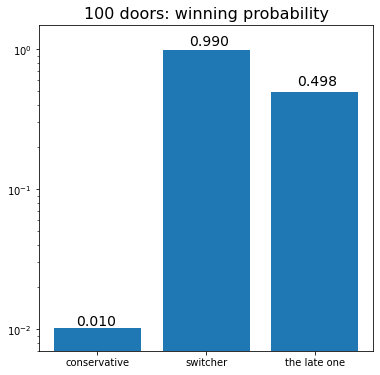

In [8]:
#plotting the results
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

partecipants = ('conservative', 'switcher', 'the late one')
winning_prob = [prob_A, prob_B, prob_C]

x_pos = np.arange(len(partecipants))
ax.bar(x_pos,winning_prob)
ax.set_xticks(x_pos)
ax.set_xticklabels(partecipants)
ax.set_title("100 doors: winning probability", fontsize=16)
ax.set_yscale('log')
ax.set_ylim(0.007, 1.5)

ax.text( -0.2, prob_A+0.0005, "%.3f" %prob_A, fontsize=14)
ax.text(1-0.16, prob_B+0.08, "%.3f" %prob_B, fontsize=14)
ax.text(2-0.16, prob_C+0.05, "%.3f" %prob_C, fontsize=14)

These results could be explained with Bayes' Theorem. Let's suppose that we have $N$ doors and we are certain of the statement $I$: only behind one door there's a car. 
The probability of picking the door with the car at the beginning is:

$$p(H_{i}|I) = \frac{1}{N} $$ 

which also represents the probability for A to win, since the conservative player never changes the door.
But now we could say that the door chosen by player B is the first and the host opens 98 doors behind which there are goats, so the statement $d_{k}$: all but the first and the k-th door are hiding goats is verified. So what's the probability that the car is behind the first door given these statements? We could use Bayes' theorem.

$$p(H_{1}|d_{k}, I) = \frac{p(d_{k}|H_{1}, I) p(H_{1}|I)}{p(d_{k}|I)}$$

Now the probability $p(d_k|H_1, I)$ is $\frac{1}{N-1}$ since the door chosen by B has to remain close and in the same way only one door among  $N-1$ has to still be closed. 
We can also write using the law of total probability:

$$p(d_{k}|I) = \sum_{i=1}^{N}{p(d_{k}|H_{i}, I)p(H_{i}|I)}$$

But then if $i \neq 1$:

$$ p(d_{k}|H_{i}, I) = \bigg \{
\begin{array}{r}
1&   \text{if $k = i$} \\
0 &  \text{otherwise}
\end{array}$$

So:

$$p(d_{k}|H_{i}, I) = p(d_{k}|H_1, I)p(H_1|I) + p(d_{k}|H_{k}, I)p(H_k|I) = \frac{1}{(N-1)N} + \frac{1}{N} = \frac{1}{N-1} $$

And:

$$p(H_{1}|d_{k}, I) = \frac{\frac{1}{N-1}\frac{1}{N}}{\frac{1}{N-1}} = \frac{1}{N}$$

And since the total probability always sum up to 1 the probability for B to win if they always change door is $\frac{N-1}{N}$.
